In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [6]:
link = "http://bit.ly/w-data"
df = pd. read_csv(link)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.shape

(25, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

there are no missing values in the data

#DATA VISUALIZATION

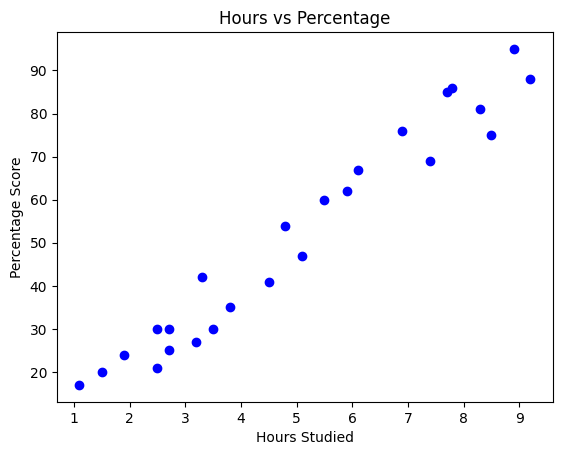

In [12]:
plt.scatter(x=df.Hours,y=df.Scores, color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

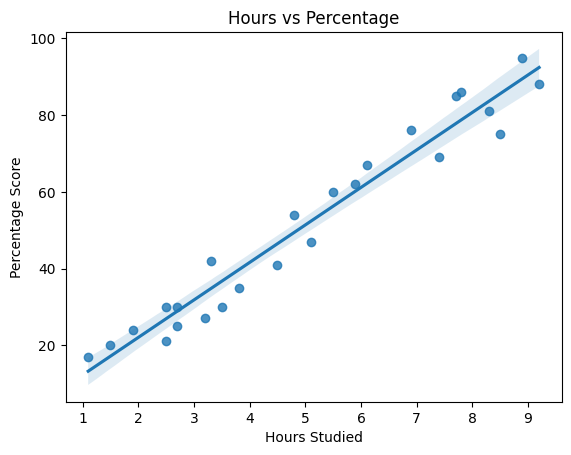

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [21]:
sns.regplot(x=df.Hours, y = df.Scores)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()
print(df.corr())

number of hours study and score are positively linearly related , so we apply Simple Linear Regression Model 

Splitting into test train

In [23]:
X=df[['Hours']]
y=df[['Scores']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape


((20, 1), (5, 1), (20, 1), (5, 1))

Fitting the model

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.coef_ #for every one unit increase in the 'Hours' studied, the predicted 'Scores' will increase by approximately 9.94 units.

array([[9.68207815]])

In [31]:
model.intercept_ #if 'Hours' is zero, the predicted 'Scores' would be approximately 1.51.

array([2.82689235])

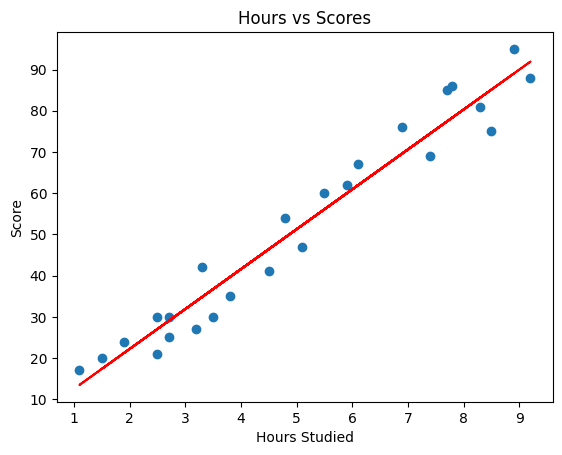

In [32]:
#plot regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y,label="Score")
plt.plot(X, line,color="red",label="Regression Line")
plt.title('Hours vs Scores')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

Prediction using fitted model

Model evaluation